In [2]:
import sys
import torch

sys.path.append("/app")
from face_lib.datasets.lightning_datasets import MXFaceDataset

In [3]:
ms1m = MXFaceDataset("/app/datasets/ms1m/", True)

In [5]:
import matplotlib.pyplot as plt

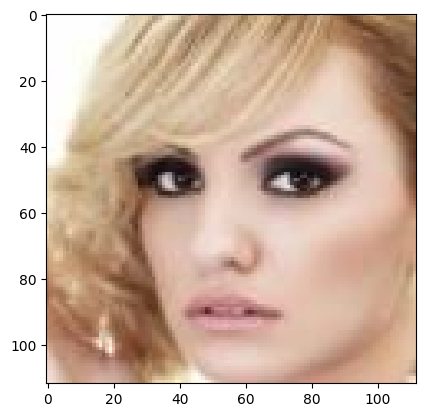

In [18]:
image = torch.permute(ms1m[1][0], (1, 2, 0))
image = (image.numpy() * 255).astype("uint8")
plt.imshow(image)

In [20]:
from torchvision import transforms


def get_color_distortion(s=1.0):
    # s is the strength of color distortion.
    color_jitter = transforms.ColorJitter(0.8 * s, 0.8 * s, 0.8 * s, 0.2 * s)
    rnd_color_jitter = transforms.RandomApply([color_jitter], p=1)
    color_distort = transforms.Compose([rnd_color_jitter])
    return color_distort

In [21]:
trans = get_color_distortion(0.4)

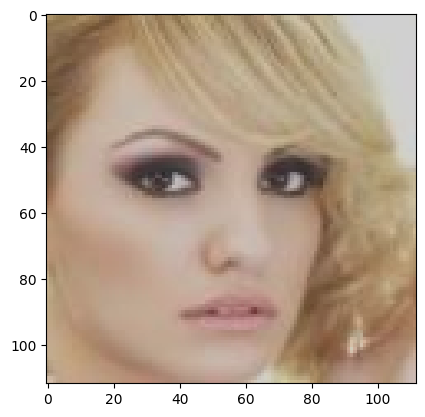

In [22]:
image = trans(ms1m[1][0])
image = torch.permute(image, (1, 2, 0))
image_blured = (image.numpy() * 255).astype("uint8")
plt.imshow(image)